<a href="https://colab.research.google.com/github/Muhammad-Asif10710/Gen-AI/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U seaborn--upgrade
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_multi_class_sentiment.csv")


In [4]:

df['words-per-tweet']= df['text'].str.split().apply(len)
#from the data where label on column text it splits the word of the text and then counts the lenght of words
df

,text,label,label_name,words-per-tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [5]:
from transformers import AutoTokenizer
model_ckpt="bert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)
text="i love asif, tokenize"
tokenized_text=tokenizer(text)
tokenized_text


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 1045, 2293, 2004, 10128, 1010, 19204, 4697, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [6]:

from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.3,stratify=df['label_name'])
train

,text,label,label_name,words-per-tweet
9590,i feel like she was bitter towards people who ...,3,anger,20
13738,i kicked myself repeatedly over the next hours...,0,sadness,12
136,i clench to the corners of the bed to feel ass...,1,joy,11
2787,i decided to try the zipline in picnic grove s...,1,joy,19
13623,i feel unsure or scared i talk,4,fear,7
...,...,...,...,...
5861,i am but all of a sudden i feel ignored and un...,0,sadness,28
13503,i feel fine tweet a name fb share type button ...,1,joy,15
9677,i started feeling like i was being paranoid si...,4,fear,12
6193,i do know that the stresses from this past wee...,1,joy,47


In [7]:
from transformers import AutoModel
import torch
model=AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [9]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.3,stratify=df['label_name'])
test, validation =train_test_split(test, test_size=1/3,stratify=test['label_name'])
#validation is done on 10 percent as size 1/3 is of test size

train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [10]:

from datasets import Dataset, DatasetDict
dataset=DatasetDict(
 {
'train':Dataset.from_pandas(train, preserve_index=False),
'test':Dataset.from_pandas(test, preserve_index=False),
'validation':Dataset.from_pandas(validation, preserve_index=False)})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet'],
        num_rows: 1600
    })
})

In [11]:
from transformers import AutoTokenizer
model_ckpt="bert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  return temp
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2514, 1037, 25283, 26147, 1998, 3449, 2080, 15417, 11084, 2010, 8489, 9140, 12208, 2015, 2033, 2245, 1997, 4190, 4232, 2021, 2002, 3866, 2033, 2025, 102], [101, 1045, 2109, 2514, 10206, 2035, 1996, 2051, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [12]:

emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)
emotion_encoded

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [13]:

label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items() }
label2id, id2label
#

({'joy': 1, 'anger': 3, 'sadness': 0, 'love': 2, 'surprise': 5, 'fear': 4},
 {1: 'joy', 3: 'anger', 0: 'sadness', 2: 'love', 5: 'surprise', 4: 'fear'})

In [14]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

In [15]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [16]:

from transformers import AutoModelForSequenceClassification, AutoConfig


num_labels = len(label2id)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
device

device(type='cuda', index=0)

In [18]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir=training_dir,  # Directory to save model checkpoints
    overwrite_output_dir=True,  # Overwrites previous training runs in the output directory
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch",  # Evaluates model at certain intervals
    num_train_epochs=2,  # Train for 2 full epochs
    learning_rate=2e-5,  # Initial learning rate
    weight_decay=0.01,  # Regularization to prevent overfitting
    disable_tqdm=False,  # Enable tqdm progress bar
)

print(training_args)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_

In [2]:
import evaluate
accuracy = evaluate.load("accuracy")
import numpy as np

def compute_metrics(eval_pred):
  predictions, labels=eval_pred
  predictions=np.argmax(predictions,axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [23]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    # pred is automatically called from trainer
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}


In [29]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    tokenizer=tokenizer# Add this line to pass the validation dataset


<ipython-input-29-74f63cff556e>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [30]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [31]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: npam10710 (npam10710-personal) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.489350,0.841250,0.837591
2,No log,0.318976,0.894375,0.894411


TrainOutput(global_step=350, training_loss=0.6824319022042411, metrics={'train_runtime': 484.9181, 'train_samples_per_second': 46.193, 'train_steps_per_second': 0.722, 'total_flos': 897898722739200.0, 'train_loss': 0.6824319022042411, 'epoch': 2.0})

In [32]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.28441187739372253,
 'test_accuracy': 0.9053125,
 'test_f1': 0.9056618367286543,
 'test_runtime': 12.7962,
 'test_samples_per_second': 250.075,
 'test_steps_per_second': 3.907}

In [33]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       933
           1       0.94      0.90      0.92      1072
           2       0.74      0.85      0.79       261
           3       0.91      0.91      0.91       432
           4       0.88      0.88      0.88       387
           5       0.86      0.71      0.78       115

    accuracy                           0.91      3200
   macro avg       0.88      0.87      0.87      3200
weighted avg       0.91      0.91      0.91      3200



In [35]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [36]:
cm = confusion_matrix(y_true, y_pred)
cm
#y axis has actual values and x axis has predicted values

array([[891,  15,   4,  12,  10,   1],
       [ 13, 967,  72,   6,   9,   5],
       [  4,  31, 222,   2,   2,   0],
       [ 24,   7,   3, 395,   3,   0],
       [ 15,   5,   0,  20, 340,   7],
       [  0,   8,   1,   0,  24,  82]])

<Axes: >

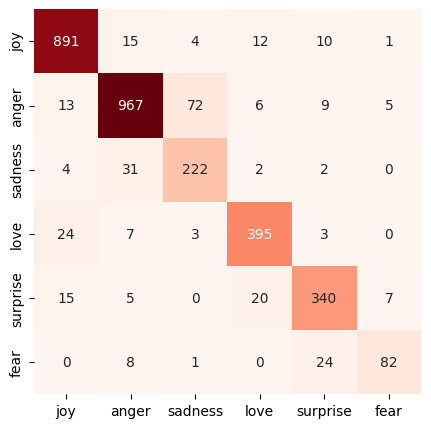

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(),fmt='d',cbar=False,cmap='Reds')
#on y axis are orignal sentiments and x axis are predicted ones

In [47]:
text="i love you"

def get_prediction(text):
    input_encoded = tokenizer(text, return_tensors='pt').to(device) # Indent this line


    with torch.no_grad(): # Indent this line
        outputs = model(**input_encoded) # Indent this line
        logits = outputs.logits # Indent this line
        pred = torch.argmax(logits, dim=1).item() # Call the method to get the value # Indent this line

    return pred, id2label[pred] # Indent this line and add a return statement

get_prediction(text)


 #converts text to tokens without any gradient using torch


 #converts text to tokens without any gradient using torch

(2, 'love')